<a href="https://colab.research.google.com/github/ginam-Kim/class_ai4dl/blob/main/week6/w6_chapter07_working_with_keras_%EA%B9%80%EA%B8%B0%EB%82%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

In [ ]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.20754182, -0.07593299, -0.08843935, -0.16296972, -0.17717764,
         -0.20263262,  0.1388548 , -0.2623672 ,  0.11322716,  0.26528674,
         -0.27483088, -0.15413621, -0.21794471, -0.24258626, -0.16456784,
          0.26919723, -0.26920414, -0.13499568, -0.29037234, -0.14066838,
         -0.0660934 , -0.2723069 , -0.24259174,  0.28652024,  0.19027245,
          0.1624935 ,  0.00827751, -0.09647457,  0.21481079,  0.07196394,
          0.1341413 ,  0.15988702,  0.2710024 , -0.05595985,  0.20718116,
         -0.11453268,  0.17578137, -0.25011048, -0.20315331, -0.24445897,
         -0.03011924,  0.2568347 , -0.0983458 ,  0.14171347,  0.27231914,
          0.13016048, -0.26266497,  0.13651302, -0.1792943 , -0.16728996,
         -0.12910403, -0.18623163, -0.23577286,  0.0506075 ,  0.20463377,
          0.08220252,  0.12987828,  0.18002784, -0.1414512 , -0.12282367,
          0.26277924,  0.01016179,  0.05749

In [ ]:
len(model.weights)

4

In [ ]:
model.weights[0].shape

TensorShape([3, 64])

In [ ]:
model.weights[1]

<tf.Variable 'dense_2/bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
model.weights[2].shape

TensorShape([64, 10])

In [ ]:
model.weights[3]

<tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

**The summary method**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

In [ ]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")

In [ ]:
inputs.shape

TensorShape([None, 3])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
features = layers.Dense(64, activation="relu")(inputs)

In [ ]:
features.shape

TensorShape([None, 64])

In [ ]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [ ]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # 0(부터) 2(미포함)까지 범위에서 정수 생성> 즉, 0 또는 1
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step


In [ ]:
title_data.shape

(1280, 10000)

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

**Training a model by providing dicts of input & target arrays**

In [ ]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 5ms/step


#### The power of the Functional API: Access to layer connectivity

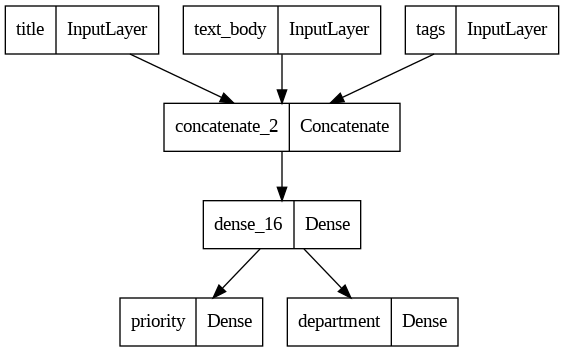

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

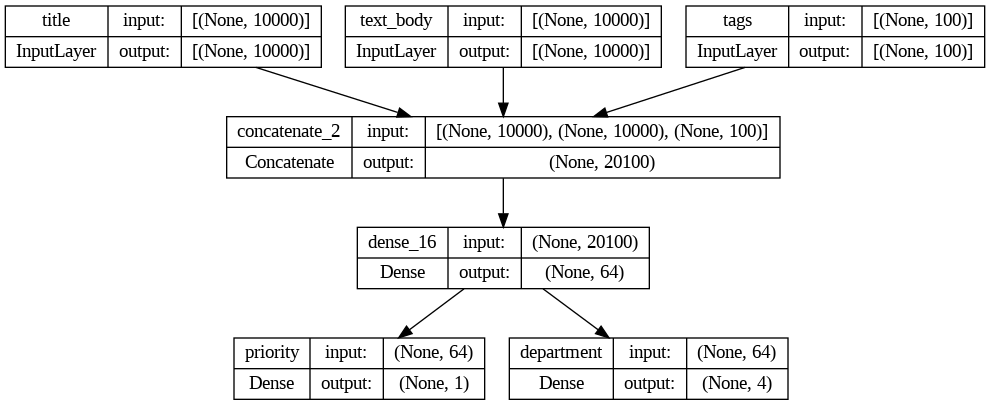

In [ ]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [ ]:
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

In [ ]:
#강의에서 추가
model.layers[3].input[0] # title 과 동일

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

In [ ]:
title
# 위와 동일하다.

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

In [ ]:
model.layers[4].output # features와 동일 > 위에 가보면 마지막 features로 정의된 텐서 객체가 이 밀집층의 output임을 알 수 있음

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_16')>

In [ ]:
features
######## 위와 동일하다

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_16')>

In [ ]:
####################
# Some questions
# -
# From Multi input, multi output example, modify your functional model as below.

features = model.layers[4].output
features = layers.Dense(36, activation="relu")(features)
features = layers.Dense(24, activation="relu")(features)

priority2 = layers.Dense(1, activation="sigmoid", name="priority")(features)
department2 = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

questions_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority2, department2])

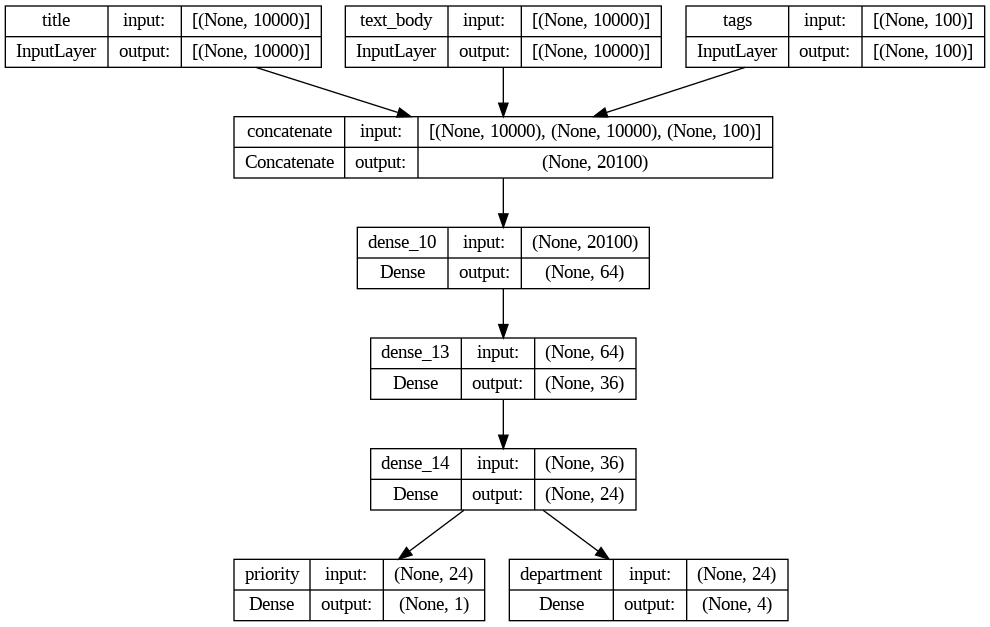

In [ ]:
keras.utils.plot_model(questions_model, "updated_ticket_classifier.png", show_shapes=True)

In [ ]:
#########################################
# Try to add difficulty output as below.

features3 = model.layers[4].output
features3 = layers.Dense(36, activation="relu")(features3)

features4 = layers.Dense(24, activation="relu")(features3)
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features3)

priority3 = layers.Dense(1, activation="sigmoid", name="priority")(features4)
department3 = layers.Dense(
    num_departments, activation="softmax", name="department")(features4)

questions_model2 = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority3, department3, difficulty])


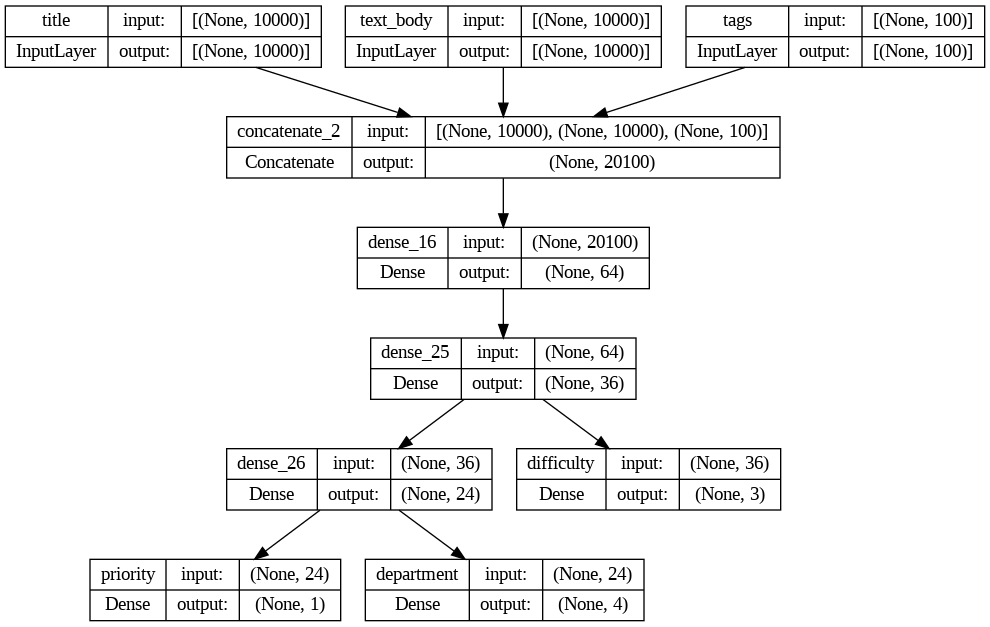

In [ ]:
keras.utils.plot_model(questions_model2, "updated_ticket_classifier.png", show_shapes=True)

**Creating a new model by reusing intermediate layer outputs**

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

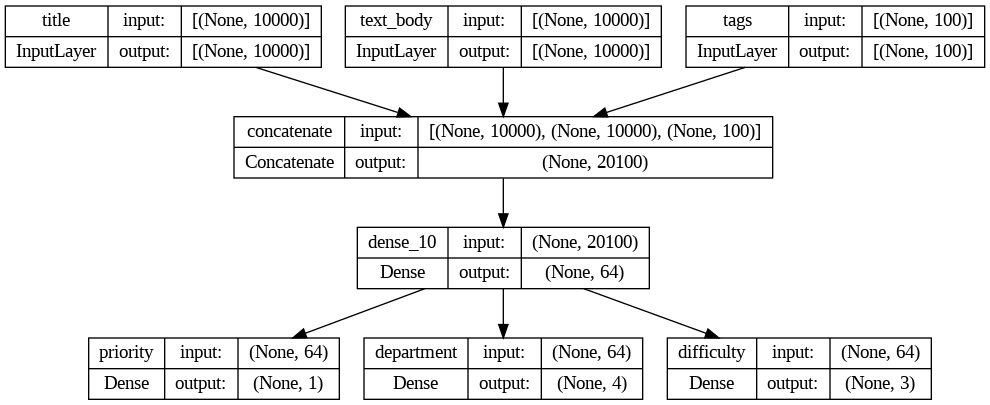

In [ ]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [ ]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [ ]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [ ]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [ ]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/3
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2992 - accuracy: 0.9118 - val_loss: 0.1412 - val_accuracy: 0.9601
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1600 - accuracy: 0.9551 - val_loss: 0.1123 - val_accuracy: 0.9679
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [ ]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2956 - accuracy: 0.9110 - rmse: 7.1779 - val_loss: 0.1514 - val_accuracy: 0.9552 - val_rmse: 7.3613
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1549 - accuracy: 0.9551 - rmse: 7.3508 - val_loss: 0.1136 - val_accuracy: 0.9681 - val_rmse: 7.4060
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.9733 - rmse: 7.4347


### Using callbacks

In [ ]:
keras.callbacks.ModelCheckpoint?

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2973 - accuracy: 0.9115 - val_loss: 0.1486 - val_accuracy: 0.9587
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1632 - accuracy: 0.9537 - val_loss: 0.1194 - val_accuracy: 0.9667
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1338 - accuracy: 0.9621 - val_loss: 0.1034 - val_accuracy: 0.9721
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1146 - accuracy: 0.9674 - val_loss: 0.0985 - val_accuracy: 0.9748
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1049 - accuracy: 0.9717 - val_loss: 0.0929 - val_accuracy: 0.9771
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9740 - val_loss: 0.0916 - val_accuracy: 0.9780
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0887 - accuracy: 0.9756 - val_loss: 0.0972 - val_accuracy:

In [ ]:
model = keras.models.load_model("checkpoint_path.keras")

In [ ]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_38 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####################
# Some questions
# From u sing callbacks, experiment with different parameters of EarlyStopping and ModelCheckpoint callbacks.
# ex) saving models for every epochs

In [ ]:
keras.callbacks.ModelCheckpoint?

In [ ]:
# keras.callbacks.ModelCheckpoint에서 매 epochs마다 모델을 저장하는 방법 알려줘
# keras.callbacks.ModelCheckpoint에서 매 epoch마다 모델을 저장하려면, save_best_only 파라미터를 False로 설정하면 됩니다. 이 경우, 모든 epoch마다 모델 가중치가 저장됩니다.

In [ ]:
# save_best_only: if `save_best_only=True`, it only saves when the model
#       is considered the "best" and the latest best model according to the
#       quantity monitored will not be overwritten. If `filepath` doesn't
#       contain formatting options like `{epoch}` then `filepath` will be
#       overwritten by each new better model.

In [ ]:
# save_best_only 파라미터를 'False'로 설정하고 filepath에 {epoch}와 같은 형식 지정자가 없는 경우와 있는 경우

# save_best_only 파라미터를 False로 설정하고, filepath에 {epoch}와 같은 형식 지정자가 없는 경우, 모든 epoch마다 모델 가중치가 저장되며, 저장된 파일은 매 epoch마다 덮어씌워집니다. 
# 예를 들어, filepath를 "model.h5"로 설정한 경우, 모든 epoch마다 "model.h5" 파일이 덮어쓰여지며, 최종 epoch에서 저장된 파일이 유지됩니다.

# 반면에, filepath에 {epoch}와 같은 형식 지정자가 있는 경우, 매 epoch마다 새로운 파일이 생성되며, 파일 이름은 해당 epoch의 번호로 지정됩니다. 
# 예를 들어, filepath를 "model_{epoch:02d}.h5"로 설정한 경우, 매 epoch마다 "model_01.h5", "model_02.h5", "model_03.h5"와 같은 이름으로 파일이 생성됩니다.

# 이렇게 save_best_only 파라미터를 False로 설정하고, filepath에 {epoch}와 같은 형식 지정자가 있는 경우, 모든 epoch마다 모델 가중치를 저장할 수 있습니다. 
# 그러나 파일의 용량이 매우 커지는 문제가 발생할 수 있으므로, 실제로는 이 방법을 사용하기 전에 신중하게 고려해야 합니다.

In [ ]:
callbacks_list2 = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path2{epoch}.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model2 = get_mnist_model()
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model2.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list2,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2938 - accuracy: 0.9127 - val_loss: 0.1388 - val_accuracy: 0.9592
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1573 - accuracy: 0.9543 - val_loss: 0.1153 - val_accuracy: 0.9669
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1280 - accuracy: 0.9634 - val_loss: 0.1085 - val_accuracy: 0.9705
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1139 - accuracy: 0.9687 - val_loss: 0.0952 - val_accuracy: 0.9743
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1023 - accuracy: 0.9723 - val_loss: 0.0878 - val_accuracy: 0.9785
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.9749 - val_loss: 0.0866 - val_accuracy: 0.9787
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0883 - accuracy: 0.9749 - val_loss: 0.0893 - val_accuracy:

In [ ]:
model2 = keras.models.load_model("checkpoint_path2.keras")

**Creating a custom callback by subclassing the `Callback` class**

In [ ]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2929 - accuracy: 0.9131 - val_loss: 0.1470 - val_accuracy: 0.9580
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1585 - accuracy: 0.9553 - val_loss: 0.1236 - val_accuracy: 0.9640
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1317 - accuracy: 0.9634 - val_loss: 0.1102 - val_accuracy: 0.9696
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1137 - accuracy: 0.9689 - val_loss: 0.1014 - val_accuracy: 0.9735
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1042 - accuracy: 0.9716 - val_loss: 0.0981 - val_accuracy: 0.9757
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0957 - accuracy: 0.9739 - val_loss: 0.0939 - val_accuracy: 0.9780
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0896 - accuracy: 0.9753 - val_loss: 0.0903 - val_accuracy:

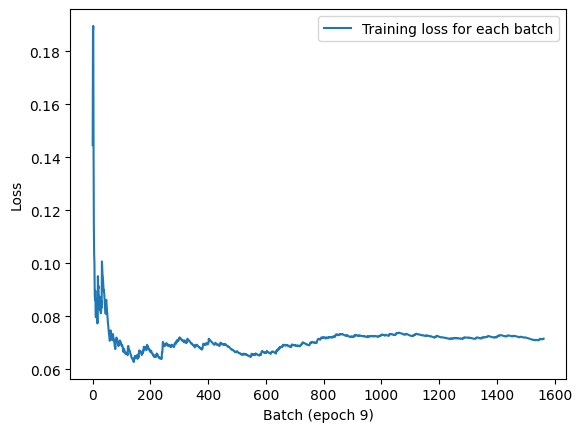

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Summary